In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

In [81]:
df = pd.read_csv('../data/processed/poc3.csv', parse_dates = ["Pickup date"])

df_clients = df[['Receiver longitude', 'Receiver latitude']].drop_duplicates().reset_index()
df_clients.index += 1
df_clients= df_clients.reset_index().drop(["index"], axis = 1).rename({"level_0":"Receiver name"}, axis = 1)
df_clients["Receiver name"] = "C"+df_clients["Receiver name"].astype(str)

df_dc = df[['Shipper longitude', 'Shipper latitude', "DC country"]].drop_duplicates().reset_index()
df_dc.index += 1
df_dc = df_dc.reset_index().drop(["index"], axis = 1).rename({"level_0":"Shipper name"}, axis = 1)
df_dc["Shipper name"] = "DC"+df_dc["Shipper name"].astype(str)

df = df[['Pickup date','Country', 'Sender weight (kg)','Shipper longitude','Shipper latitude', 'Receiver longitude', 'Receiver latitude']].merge(df_clients, on = ['Receiver longitude', 'Receiver latitude'], how = "left").merge(df_dc, on = ['Shipper longitude', 'Shipper latitude'], how = "left")
df = df[(df["Shipper name"]=="DC2")|(df["Shipper name"]=="DC3")]

C:\Users\marle\AppData\Local\Temp\ipykernel_26968\187327679.py:1: DtypeWarning:

Columns (1,5,14) have mixed types. Specify dtype option on import or set low_memory=False.



In [84]:
df["Sender weight (kg)"].max()

19880.0

In [85]:
Q1 = np.percentile(df["Sender weight (kg)"], 25, method='midpoint')
Q3 = np.percentile(df["Sender weight (kg)"], 75, method='midpoint')
Q1 = df["Sender weight (kg)"].quantile(0.25)
Q3 = df["Sender weight (kg)"].quantile(0.75)
IQR = Q3 - Q1
print(IQR)
upper=Q3+1.5*IQR
upper_array=np.array(df["Sender weight (kg)"]>=upper)
print("Upper Bound:",upper)
print(upper_array.sum())
 
#Below Lower bound
lower=Q1-1.5*IQR
lower_array=np.array(df["Sender weight (kg)"]<=lower)
print("Lower Bound:",lower)
print(lower_array.sum())
df = df[(df["Sender weight (kg)"]>lower)&(df["Sender weight (kg)"]<upper)]

18.639
Upper Bound: 47.9155
44760
Lower Bound: -26.6405
0


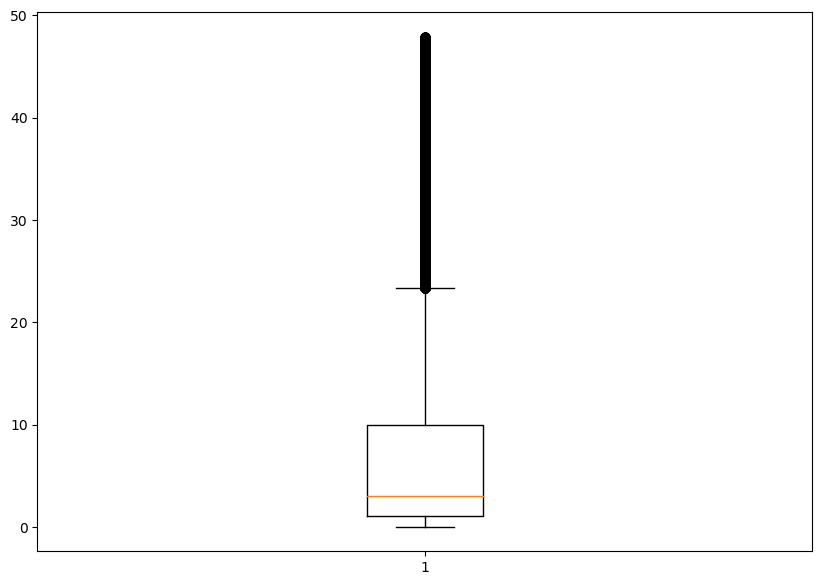

In [86]:
fig = plt.figure(figsize =(10, 7))

# Creating plot
plt.boxplot(df["Sender weight (kg)"])
plt.show()

In [119]:
dc = "DC2"
df_test = df[(df["Shipper name"]==dc)]
#df_test = df[(df["Shipper name"]=="DC2")|(df["Shipper name"]=="DC3")]
df_test = df_test.groupby(["Shipper name", "Receiver name", "Receiver longitude", "Receiver latitude", "Shipper longitude", "Shipper latitude"]).sum().reset_index()
#df_test = df_test.groupby(["Receiver name", "Receiver longitude", "Receiver latitude"]).sum().reset_index()
df_test = df_test[df_test["Sender weight (kg)"]>5]

C:\Users\marle\AppData\Local\Temp\ipykernel_26968\1243729310.py:4: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [120]:
df_test.shape

(3782, 7)

In [121]:
def show_map(df, lat_column, lon_column):
    fig = go.Figure()
    fig.add_trace(go.Scattermapbox(lat=df[f"{lat_column}"].to_list(), lon=df[f"{lon_column}"].to_list(), mode = 'markers', marker = {'size': 6}))
    fig.update_layout(margin={"r": 0, "t": 40, "l": 0, "b": 40}, mapbox={
                      'zoom': 5, "center": {'lat': df[f"{lat_column}"].mean(), 'lon': df[f"{lon_column}"].mean()}})
    fig.update_layout(mapbox_style="open-street-map")
    return fig

In [122]:
show_map(df_test, "Receiver latitude", "Receiver longitude")